In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading csv file
df_stocks=pd.read_csv(r"C:\Users\devanshu suri\Downloads\company-stock-time-series\Company Stock and Investment.csv")
df_stocks

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [3]:
# Displaying first few rows

df_stocks.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
# Making a separate dataframe for Oil Investments

df_stocks_oil=pd.DataFrame({"Date":df_stocks.Date,"oil":df_stocks['Oil Investments']})
df_stocks_oil

,Date,oil
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
...,...,...
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376


In [5]:
# convert  datatype into datetime datatype

df_stocks_oil['Date']=pd.to_datetime(df_stocks_oil['Date'])

#preprocessing (since arima takes univariate series as input so we setting date feature as index)
df_stocks_oil.set_index('Date',inplace=True)

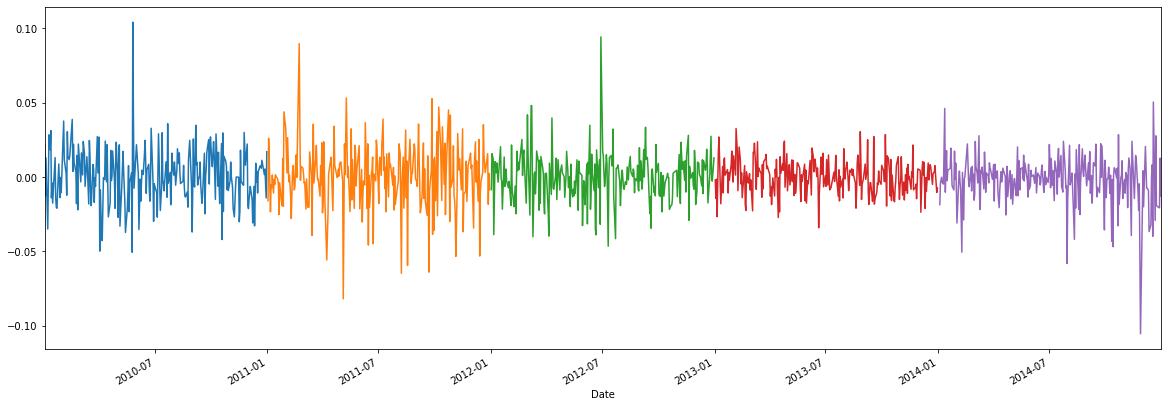

In [6]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(for year 2010 -2014)...
plt.subplots(figsize=(20,7))
df_stocks_oil.loc['2010', 'oil'].plot()
df_stocks_oil.loc['2011', 'oil'].plot()
df_stocks_oil.loc['2012', 'oil'].plot()
df_stocks_oil.loc['2013', 'oil'].plot()
df_stocks_oil.loc['2014', 'oil'].plot()

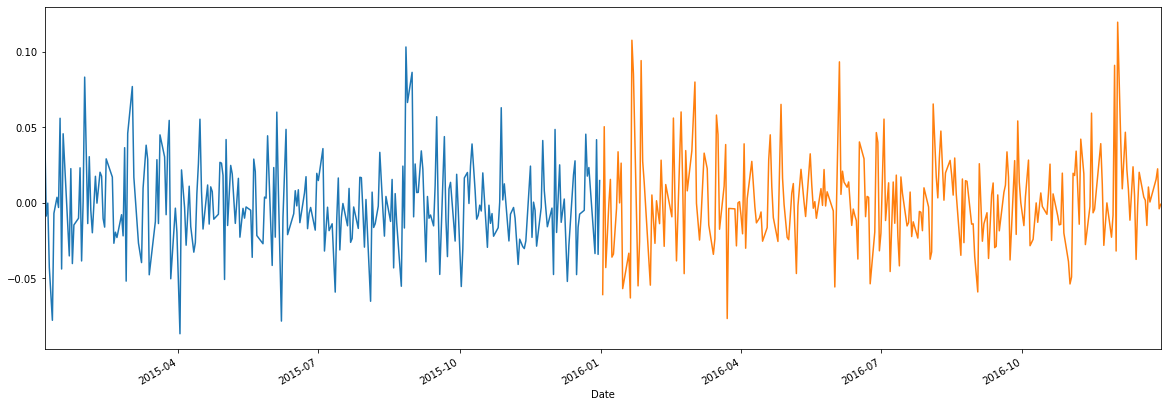

In [7]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(2015 -2016)...
plt.subplots(figsize=(20,7))
df_stocks_oil.loc['2015', 'oil'].plot()
df_stocks_oil.loc['2016', 'oil'].plot()

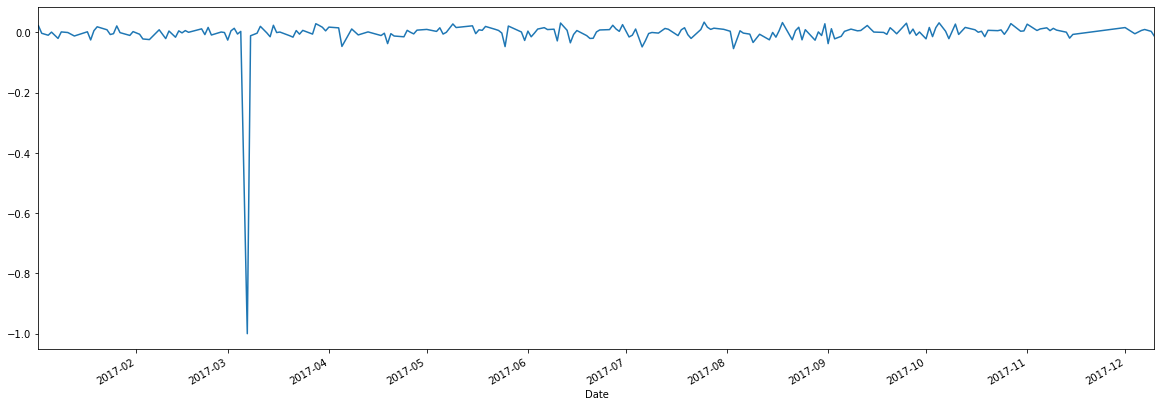

In [8]:
# Plotting data for year 2017..
plt.subplots(figsize=(20,7))
df_stocks_oil.loc['2017', 'oil'].plot()

* In above plot data looks like seasonal data. Now we will check if data is stationary or not

In [9]:
#Ho: It is non stationary
#H1: It is stationary
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [10]:
# displaying adfuller values

adfuller_test(df_stocks_oil['oil'])

ADF Test Statistic : -45.942162929839924
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


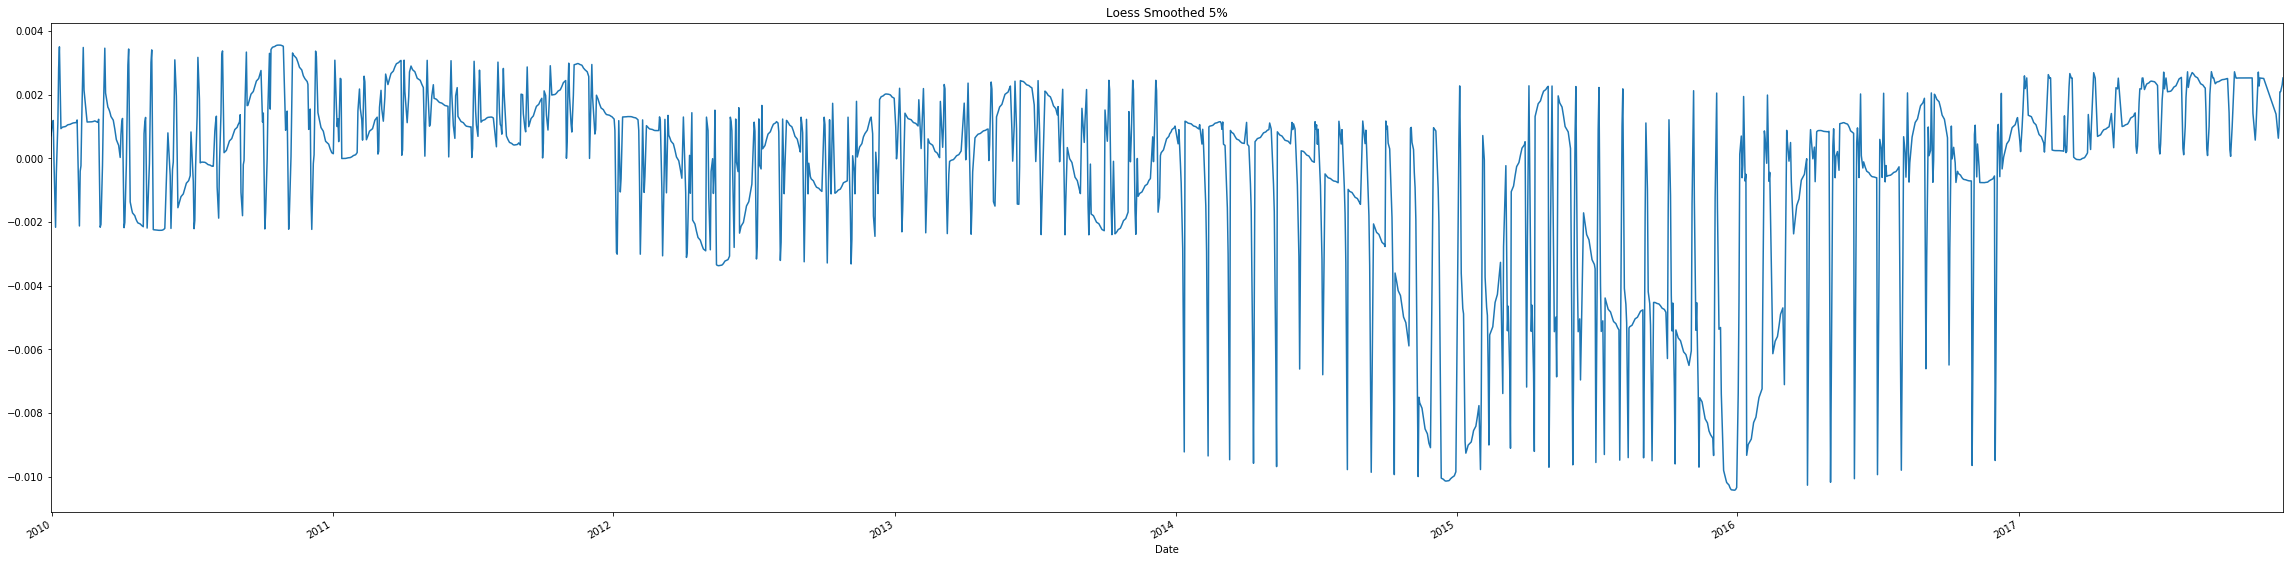

In [11]:
# Smooth graph for the data

from statsmodels.nonparametric.smoothers_lowess import lowess
df_loess_5 = pd.DataFrame(lowess(df_stocks_oil.oil, np.arange(len(df_stocks_oil.oil)), frac=0.05)[:, 1], index=df_stocks_oil.index, columns=['oil'])
df_loess_5['oil'].plot( title='Loess Smoothed 5%',figsize=(40,10))

>> To visualise the data clearly we  use smoothers_lowess

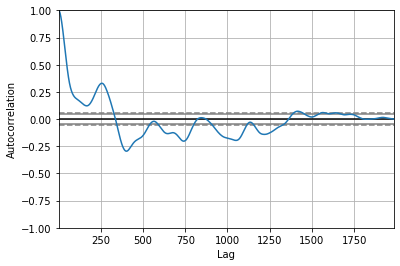

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_loess_5['oil'])
plt.show()

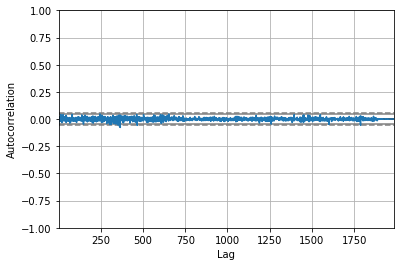

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_stocks_oil['oil'])
plt.show()

* **In above plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values**

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\devanshu suri\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


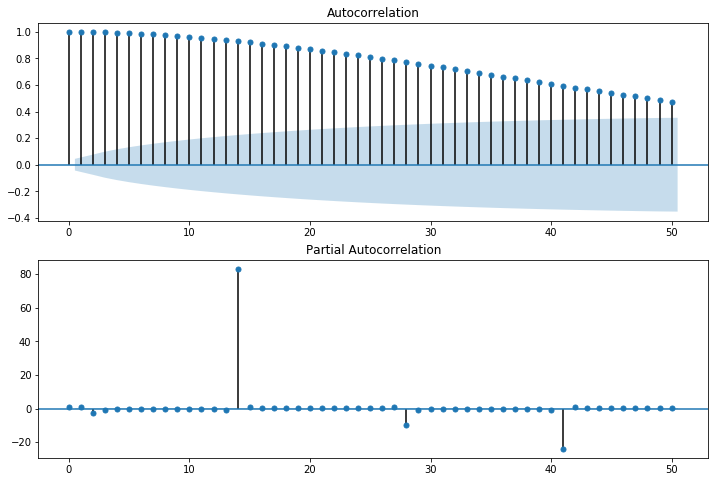

In [15]:
# Plotting autocorreltion plot partial autocorreltion plot

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_loess_5['oil'].iloc[1:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_loess_5['oil'].iloc[1:],lags=50,ax=ax2)

>> Plotting ACF and PACF graphs will get us p and q values and d=0 as the data is stationary but from above ACF and PACf graphs  we can say the values of p and q is not clear,so its difficult to implement arima so we are going to use auto_arima.


In [16]:
# Create Training and Validation sets
# train contains 6yr data (2009-2016)
train = df_stocks_oil['oil'][:1512] 
# test contains 2yr data (2016-2017)
validation=df_stocks_oil['oil'][1513:1986] 

>> In Auto ARIMA, it will generate itself the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In [17]:
import pmdarima as pm
pmodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=11.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-6453.217, Time=0.41 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-6905.542, Time=4.01 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=12.67 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-6455.216, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-6464.867, Time=0.75 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-7086.597, Time=14.96 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.87 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.46 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-7085.549, Time=19.88 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-7086.394, Time=23.14 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-7086.955, Time=19.37 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-6906.421, Time=7.07 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=38.83 sec
 ARIMA(1,0,1)(1,1,1)[12] i

In [18]:
pmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1512
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                3549.471
Date:                             Sun, 01 Nov 2020   AIC                          -7088.942
Time:                                     19:11:46   BIC                          -7062.376
Sample:                                          0   HQIC                         -7079.046
                                            - 1512                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5770      0.219     -2.630      0.009      -1.007      -0.147
ma.L1          0.5276      0.230      2.299      0.022       0.078       0.977
ar.S.L12      -0.6851      0.022    -31.601      0.000      -0.728      -0.643
ar.S.L24      -0.3431      0.021    -16.461      0.000      -0.384      -0.302
sigma2         0.0005   1.24e-05     41.229      0.000       0.000       0.001
===================================================================================
Ljung-Box (Q):                      190.89   Jarque-Bera (JB):               510.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

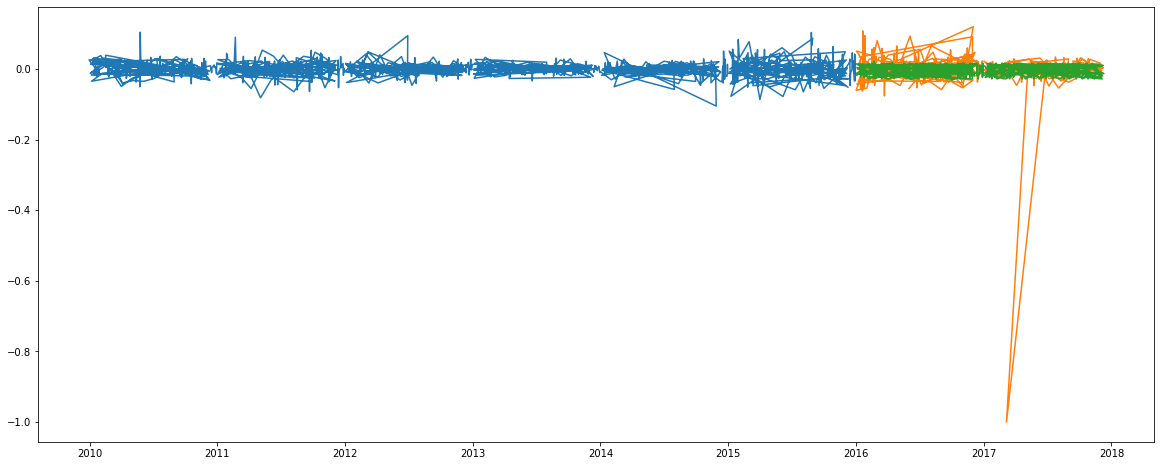

In [19]:
# Forecasting the model over validation data i.e 2017 and 2018


forecast = pmodel.predict(n_periods=len(validation))
forecast = pd.DataFrame(forecast,index = validation.index,columns=['Prediction'])

#plot the predictions for validation set
plt.subplots(figsize=(20,8))
plt.plot(train, label='Train')
plt.plot(validation, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()


In [20]:
# Printing Errors..
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(validation, forecast)
print('MSE(Mean Squarred Error): '+str(mse))
mae = mean_absolute_error(validation, forecast)
print('MAE(Mean Absolute Error): '+str(mae))
rmse = np.sqrt(mean_squared_error(validation, forecast))
print('RMSE(Root Mean Squared Error): '+str(rmse))

MSE(Mean Squarred Error): 0.003141619408849471
MAE(Mean Absolute Error): 0.026088202967783435
RMSE(Root Mean Squared Error): 0.056050150836991254


In [21]:
# Saving the data in a dataframe

forecast["Previous"]=df_stocks_oil["oil"]

In [22]:
forecast

,Prediction,Previous
Date,,
2016-06-01,-0.024176,-0.055602
2016-07-01,-0.014521,-0.020018
2016-08-01,-0.015828,-0.002704
2016-11-01,0.016298,-0.053614
2016-12-01,-0.002297,-0.031827
...,...,...
2017-09-11,0.014899,0.005984
2017-10-11,0.002478,-0.007173
2017-11-13,-0.028523,0.000352


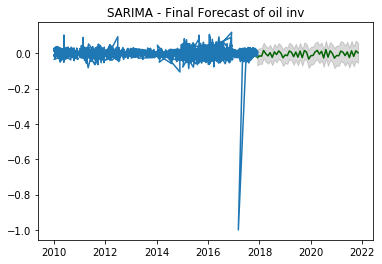

In [23]:
# Forecasting the model over the 2019 , 2020 and 2021 year

fitted, confint = pmodel.predict(n_periods=48, return_conf_int=True)
index_of_fc = pd.date_range(validation.index[-1], periods = 48, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_stocks_oil)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of oil inv")
plt.show()

In [24]:
# Let's create a dataframe to take  forecast values and thn give the column name to those values i.e Date and Oil_Pred
fitted_series_pred = pd.DataFrame(fitted_series,columns=["Oil_Pred"]) 
fitted_series_pred.index.name="Date"
fitted_series_pred

,Oil_Pred
Date,
2017-12-01,-0.024176
2018-01-01,-0.014521
2018-02-01,-0.015828
2018-03-01,0.016298
2018-04-01,-0.002297
2018-05-01,-0.014554
2018-06-01,0.004116
2018-07-01,-0.023139
2018-08-01,0.008459


In [25]:
#Save the predicted values into a excel file
fitted_series_pred.to_excel(r"C:\Users\devanshu suri\Downloads\Oil_Investments_Prediction.xlsx")

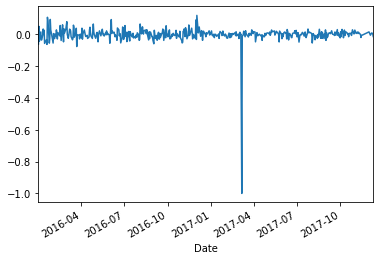

In [26]:
validation.plot(label='Previous data')

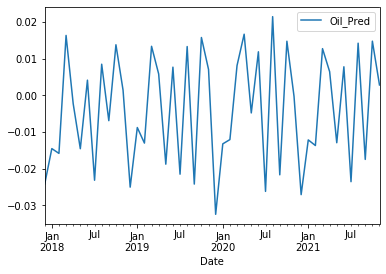

In [27]:
fitted_series_pred.plot()

## Conclusion
>> 1)In 2011, 2012, 2015, 2016,2017, the prices were high that was the time to sell the stocks.

>> 2) In 2017 and 2018 were the years of least values So now the investors should hold the stocks for the oil. 

>> 3) Right now we can Invest in oil stocks as the prices are low right now and tends to increase in July-August month of each year.

>> 4) In July-August and dec to jan,2020 and 2021 values will be at peak, so that time would be best according to the model.

>> 5) In november,2020 and september,2021 prices will increases, so that time would be best according to the model to sell.

>> 6) december,2020 and august,2021 prices are less, so the best time periods to invest in the market according to the ,model.